In [2]:
#import libraries
import numpy as np              
import pickle
import warnings
import pandas as pd              
import tensorflow as tf 
import matplotlib.pyplot as plt 
warnings.filterwarnings("ignore") 
from   tensorflow.keras.models import Sequential
from   tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from   tensorflow.keras.preprocessing.image import ImageDataGenerator
from   sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

***
### MODELING
*** 
To perform the modeling, CNN models were considerd for the image classififcation problem we have because of their ability of capture spatial hierarchies, reduce computational complexity, and leverage hierarchical feature learning in images. Their design principles, including local connectivity, parameter sharing, and pooling, make them particularly well-suited for processing and understanding visual data.


The following were the models we considered first.
1. Use of a BASELINE CNN MODEL
2. Use of a CNN MODEL WITH IMAGE AUGEMENTATION 


***
##### BASELINE CNN MODEL WITH NO IMAGE AUGMENTATION
***

In [3]:
#train data generator
train_datagen = ImageDataGenerator(
         rescale=1./255)

train_data = train_datagen.flow_from_directory(
    'RealWaste2/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
#Val data generator
val_datagen = ImageDataGenerator(rescale = 1./255)
val_data = val_datagen.flow_from_directory(
    'RealWaste2/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
#Test Data Generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    'RealWaste2/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 3002 images belonging to 8 classes.
Found 857 images belonging to 8 classes.
Found 433 images belonging to 8 classes.


***
### BASELINE CNN MODEL
***

In [4]:
def build_cnn_model(input_shape, num_classes):
    model = Sequential()

    # Convolutional Layer 1
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolutional Layer 2
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolutional Layer 3
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten and Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model
input_shape = (224, 224, 3)  
num_classes = 8 

model = build_cnn_model(input_shape, num_classes)

# compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
# Fitting the model
history = model.fit(train_data,
                    epochs=10, 
                    validation_data=val_data
)


Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.1911 - loss: 2.3878 - val_accuracy: 0.3827 - val_loss: 1.6599
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.3610 - loss: 1.6902 - val_accuracy: 0.4037 - val_loss: 1.5535
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.4021 - loss: 1.5847 - val_accuracy: 0.4796 - val_loss: 1.3952
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.4397 - loss: 1.4681 - val_accuracy: 0.4772 - val_loss: 1.3457
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.5155 - loss: 1.2979 - val_accuracy: 0.5321 - val_loss: 1.2527
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.5423 - loss: 1.1930 - val_accuracy: 0.5694 - val_loss: 1.2014
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.5917 - loss: 1.0934 - val_accuracy: 0.5251 - val_loss: 1.2367
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.6175 - loss: 1.0018 - val_accuracy: 0.5928 - v

In [16]:
# Evaluating the Test data
results = model.evaluate(test_data, verbose=0)

print("   Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

   Test Loss: 1.19676
Test Accuracy: 57.97%


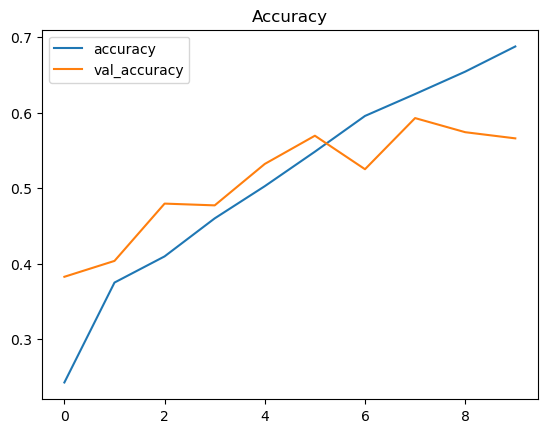

In [21]:
# Plotting for accuracy in the model
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

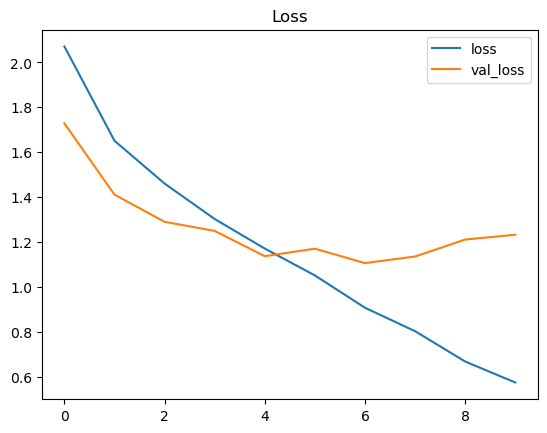

In [ ]:
#Plotting for Loss in the Model
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

***
Findings and Observations
***

- The model's predicted accuracy on the test images was 53%. This was the baseline accuracy we achieved and can be seen that it already predicts the images better than chance.
- It can be seen that the training accuracy continues to increase while the test data has started to plateau at about 50% with the loss function also starting to plateau
- Further epochs would result in overfitting
- Consideration for image augmentation to improve the accuracy was hence considered

***
### CNN MODEL WITH IMAGE AUGMENTATION 
***

In [23]:
#train data generator
train_datagen = ImageDataGenerator(
         rescale=1./255,
        rotation_range=45,     
        width_shift_range=0.2,   
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='reflect')

train_generator = train_datagen.flow_from_directory(
    'RealWaste2/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
#Val data generator
val_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = val_datagen.flow_from_directory(
    'RealWaste2/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
#Test Data Generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'RealWaste2/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 3002 images belonging to 8 classes.
Found 857 images belonging to 8 classes.
Found 433 images belonging to 8 classes.


In [24]:
# Function to build the CNN architecture
def build_cnn_model(input_shape, num_classes):
    model = Sequential()

    # Convolutional Layer 1
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolutional Layer 2
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolutional Layer 3
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten and Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model
input_shape = (224, 224, 3)  
num_classes = 8  

model1 = build_cnn_model(input_shape, num_classes)

# Compiling the model
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [25]:
# Fitting the model
history = model1.fit(train_generator,
                    epochs=10, 
                    validation_data=validation_generator
)

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.1727 - loss: 2.2026 - val_accuracy: 0.2602 - val_loss: 1.8429
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.2906 - loss: 1.9088 - val_accuracy: 0.3746 - val_loss: 1.6407
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.3253 - loss: 1.7836 - val_accuracy: 0.4189 - val_loss: 1.5638
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.3609 - loss: 1.6471 - val_accuracy: 0.3944 - val_loss: 1.5784
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.4296 - loss: 1.5275 - val_accuracy: 0.4621 - val_loss: 1.4643
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.4608 - loss: 1.4504 - val_accuracy: 0.4621 - val_loss: 1.4327
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.4933 - loss: 1.3948 - val_accuracy: 0.5239 - val_loss: 1.3455
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.4725 - loss: 1.4101 - val_accuracy: 0.4831 - v

In [26]:
# Evaluating the Test data
results = model1.evaluate(test_generator, verbose=0)

print("   Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

   Test Loss: 1.28178
Test Accuracy: 57.27%


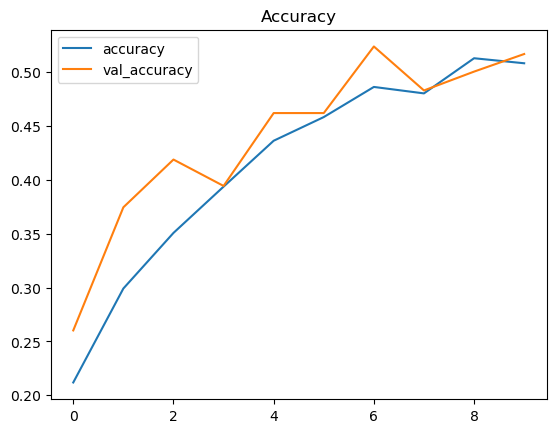

In [29]:
# Plotting for accuracy in the model
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

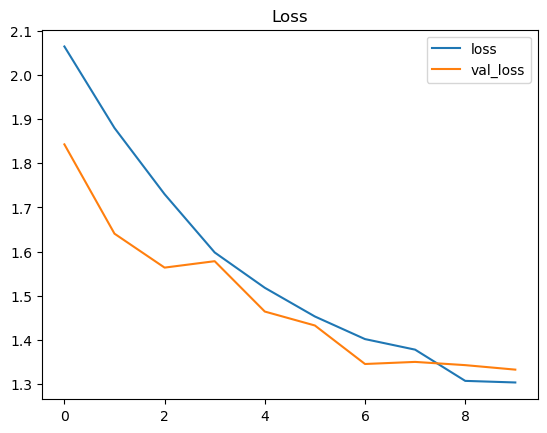

In [30]:
#Plotting for Loss in the Model
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

***
Findings and Observations
***
- The train images underwent transformation by augmentating it using Zoom range, shear range, rotation range, horizontal flip, width shift range and height shift range.
- This improved the accuracy to 57% though the loss function was progressively worse.
- Though there was an improvement to the models accuracy, it was not enough to achieve the accuracy we desired. Further consideration was given to employ pre trained CNN architectures that would better improve the models performances such as models from inception, densenet, efficientnet and resnet families